In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *

In [2]:
tf.enable_eager_execution()
import numpy as np
import os
import time
import functools

In [3]:
path_to_file = tf.keras.utils.get_file('irish.abc', 'https://raw.githubusercontent.com/aamini/introtodeeplearning_labs/2019/lab1/data/irish.abc')

In [4]:
text = open(path_to_file).read()

In [6]:
print("Dlugosc: ", len(text))

Dlugosc:  197618


In [7]:
vocab = sorted(set(text))

In [8]:
char2idx = {u:i for i,u in enumerate(vocab)}

In [10]:
text_as_int = np.array([char2idx[c] for c in text])

In [13]:
idx2char = np.array(vocab)

In [14]:
for char, _ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))

  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  "'" :   5,
  '(' :   6,
  ')' :   7,
  ',' :   8,
  '-' :   9,
  '.' :  10,
  '/' :  11,
  '0' :  12,
  '1' :  13,
  '2' :  14,
  '3' :  15,
  '4' :  16,
  '5' :  17,
  '6' :  18,
  '7' :  19,


In [15]:
seq_length = 100

In [16]:
examples_per_epoch = len(text) // seq_length

In [18]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [20]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [22]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [23]:
x, y = split_input_target("hello world")

In [26]:
text_as_int[0:100]

array([49, 22, 13,  0, 45, 22, 26, 67, 60, 79, 56, 69, 59, 60, 73,  5, 74,
        0, 51, 22,  1, 64, 59, 22, 59, 58,  9, 63, 70, 73, 69, 71, 64, 71,
       60,  9, 13,  0, 38, 22, 28, 82,  0, 37, 22, 13, 11, 20,  0, 36, 22,
       29,  1, 38, 56, 65, 70, 73,  0,  6, 15, 26, 27, 58, 82, 59, 26, 31,
       26,  1, 29, 31, 26, 59, 82, 61, 59, 58, 59,  1, 31, 26, 59, 61, 82,
       62, 61, 62, 60,  1, 61, 60, 61, 59, 82,  6, 15, 60, 61, 60])

In [27]:
dataset = sequences.map(split_input_target)

In [28]:
for input_example, target_example in dataset.take(2):
    print (input_example)
    print(target_example)
    #for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    #    print("Step {:4d}".format(i))
    #    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    #    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Instructions for updating:
Colocations handled automatically by placer.
tf.Tensor(
[49 22 13  0 45 22 26 67 60 79 56 69 59 60 73  5 74  0 51 22  1 64 59 22
 59 58  9 63 70 73 69 71 64 71 60  9 13  0 38 22 28 82  0 37 22 13 11 20
  0 36 22 29  1 38 56 65 70 73  0  6 15 26 27 58 82 59 26 31 26  1 29 31
 26 59 82 61 59 58 59  1 31 26 59 61 82 62 61 62 60  1 61 60 61 59 82  6
 15 60 61 60], shape=(100,), dtype=int64)
tf.Tensor(
[22 13  0 45 22 26 67 60 79 56 69 59 60 73  5 74  0 51 22  1 64 59 22 59
 58  9 63 70 73 69 71 64 71 60  9 13  0 38 22 28 82  0 37 22 13 11 20  0
 36 22 29  1 38 56 65 70 73  0  6 15 26 27 58 82 59 26 31 26  1 29 31 26
 59 82 61 59 58 59  1 31 26 59 61 82 62 61 62 60  1 61 60 61 59 82  6 15
 60 61 60  1], shape=(100,), dtype=int64)
tf.Tensor(
[ 6 15 59 58 27  1 26 14  1  6 15 26 27 58 82  2  0 59 26 31 26  1 29 31
 26 59 82 61 59 58 59  1 31 26 59 61 82 62 61 62 60  1 61 60 61 59 82  6
 15 60 61 60  1 59 58  1 59 14 22 82  2  0 26 32 82 31 26 59 26  1 31 26
 59 26 8

In [29]:
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [30]:
vocab_size = len(vocab)

In [31]:
embedding_dim = 256

In [32]:
rnn_units = 1024

In [33]:
LSTM = functools.partial(
    tf.keras.layers.LSTM, recurrent_activation='sigmoid')


In [34]:
LSTM = functools.partial(LSTM, 
  return_sequences=True, 
  recurrent_initializer='glorot_uniform',
  stateful=True
)

In [35]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
            Embedding(vocab_size, embedding_dim,
                      batch_input_shape=[batch_size, None]),
    LSTM(rnn_units),
    Dense(vocab_size)
    ])
    return model

In [36]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           21248     
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 83)            85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [38]:
for input_example_batch, target_example_batch in dataset.take(1): 
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 83) # (batch_size, sequence_length, vocab_size)


In [39]:
sampled_indices = tf.random.multinomial(example_batch_predictions[0], num_samples=1)


Instructions for updating:
Use tf.random.categorical instead.


In [40]:
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()


In [41]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))

Input: 
 'e|d2ge d2ge|dcBA G2GB|!\nAGAB cBcd|efec d2ge|dBGB dedB|c2A2 A3:|!\nd|efec d2g2|efec d2g2|fgaf dgg2|fga'


In [42]:
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Next Char Predictions: 
 'e.!Pg7ZQW==3 d2KJr<3eb!|xQmrX3KR-M#[fpqZg(P[L:^[G^[)0(SG|Xsmh^j|b"pP\ncWf6],KhpOV9jm,=ja= RR18my\'C8"n'


In [43]:
def compute_loss(labels, logits):
    return tf.keras.backend.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [44]:
example_batch_loss  = compute_loss(target_example_batch, example_batch_predictions)

In [45]:
print("scalar_loss:      ", example_batch_loss.numpy().mean())

scalar_loss:       4.419494


In [46]:
optimizer = tf.train.AdamOptimizer()
checkpoint_dir = './traning_checkpoints_abc'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
import util_abc

N/A%|#                                               |ETA:      N/A  Loss: 3.41

KeyboardInterrupt: 

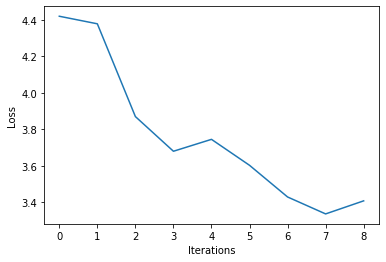

In [47]:
history = []
plotter = util_abc.PeriodicPlotter(sec=1, xlabel='Iterations', ylabel='Loss')

for epoch in range(5):
        hidden = model.reset_states()
        custom_msg = util_abc.custom_progress_text("Loss: %(loss)2.2f")
        bar = util_abc.create_progress_bar(custom_msg)
        for inp, target in bar(dataset):
        # Use tf.GradientTape()
            with tf.GradientTape() as tape:
                '''TODO: feed the current input into the model and generate predictions'''
                predictions = model(inp) # TODO
                '''TODO: compute the loss!'''
                loss = compute_loss(target, predictions) # TODO
        
            # Now, compute the gradients and try to minimize
            '''TODO: complete the function call for gradient computation'''
            grads = tape.gradient(loss, model.trainable_variables) # TODO
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            # Update the progress bar!
            history.append(loss.numpy().mean())
            custom_msg.update_mapping(loss=history[-1])
            plotter.plot(history)
    
        # Update the model with the changed weights!
        model.save_weights(checkpoint_prefix.format(epoch=epoch))
model.save("model_abc.hf5")

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))